In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
from fuzzy_expert.variable import FuzzyVariable
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

# import some data to play with
iris = datasets.load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [4]:
profile = ProfileReport(df, title="Pandas Profiling Report")

In [5]:
%matplotlib inline

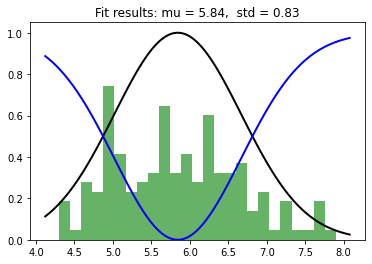

In [6]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = iris.data[:,0]
# data = iris.target

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std) * (1/norm.pdf(mu, mu, std))
plt.plot(x, p, 'k', linewidth=2)
plt.plot(x, 1-p, 'b', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plt.savefig("b.png")
plt.show()

In [7]:
def get_fuzzy_value(x0, data):
    mu, std = norm.fit(data)
    
    low = 1 - norm.pdf(x0, mu, std) * (1/norm.pdf(mu, mu, std)) if x0<mu else 0
    medium = norm.pdf(x0, mu, std) * (1/norm.pdf(mu, mu, std))
    high = 1 - norm.pdf(x0, mu, std) * (1/norm.pdf(mu, mu, std)) if x0>mu else 0
    return low, medium, high

In [8]:
x0 = 5.0
low, medium, high = get_fuzzy_value(x0, iris.data[:,0])
low, medium, high

(0.4067193562833866, 0.5932806437166134, 0)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.33, random_state=42, stratify=iris.target)

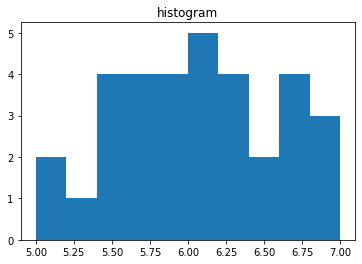

In [10]:
plt.hist(np.squeeze(X_train[np.argwhere(y_train==1)])[:,0]) 
plt.title("histogram") 
plt.show()

In [11]:
# 0 -> sepal length (cm) -> low
#      sepal width (cm)  -> high
#      petal length (cm) -> low
#      petal width (cm)  -> low

In [12]:
# 1 -> sepal length (cm) -> medium
#      sepal width (cm)  -> low
#      petal length (cm) -> medium
#      petal width (cm)  -> medium

In [13]:
# 2 -> sepal length (cm) -> high
#      sepal width (cm)  -> medium
#      petal length (cm) -> high
#      petal width (cm)  -> high

In [14]:
# sepal length (cm) -> low, petal length (cm) -> low, petal width (cm)  -> low -> 0
# sepal length (cm) -> medium, petal length (cm) -> medium, petal width (cm)  -> medium -> 1
# sepal length (cm) -> high, petal length (cm) -> high, petal width (cm)  -> high -> 2

In [15]:
print(X_test[0], y_test[0])
print(max(get_fuzzy_value(X_test[0][0], iris.data[:,0])[0], get_fuzzy_value(X_test[0][2], iris.data[:,2])[0], get_fuzzy_value(X_test[0][3], iris.data[:,3])[0]))
print(max(get_fuzzy_value(X_test[0][0], iris.data[:,0])[1], get_fuzzy_value(X_test[0][2], iris.data[:,2])[1], get_fuzzy_value(X_test[0][3], iris.data[:,3])[1]))
print(max(get_fuzzy_value(X_test[0][0], iris.data[:,0])[2], get_fuzzy_value(X_test[0][2], iris.data[:,2])[2], get_fuzzy_value(X_test[0][3], iris.data[:,3])[2]))

[6.3 2.8 5.1 1.5] 2
0
0.9246698080946223
0.2524096329141523


59.94646034311081


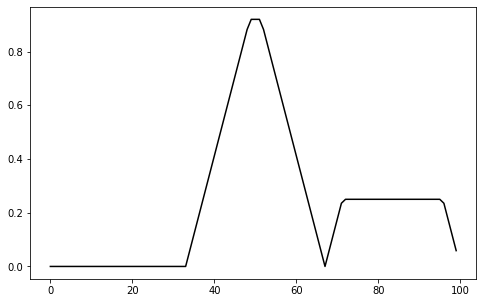

In [16]:
import skfuzzy as fuzz
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 100, 1)
mfx = fuzz.trapmf(x, [33, 48.64, 51.36,  67])*0.92
mfx2 = fuzz.trapmf(x, [67, 71.25, 95.75,  100])*0.25

plt.figure(figsize=(8, 5))

plt.plot(x,mfx2+ mfx, 'k')
defuzz_centroid = fuzz.defuzz(x, mfx+mfx2, 'centroid')  # Same as skfuzzy.centroid
print(defuzz_centroid)

In [17]:
def predict(x1, x2, x3):
  x = np.arange(0, 100, 1)
  mfx1 = fuzz.trapmf(x, [0, 16.5*x1, 33-16.5*x1,  33])*x1
  mfx2 = fuzz.trapmf(x, [33, 33+17*x2, 67-17*x2,  67])*x2
  mfx3 = fuzz.trapmf(x, [67, 67+16.5*x3, 100-16.5*x3,  100])*x3
  centroid= fuzz.defuzz(x, mfx1+mfx2+mfx3, 'centroid')  # Same as skfuzzy.centroid
  if centroid<=33:
    return 0
  if centroid<=67:
    return 1
  return 2
predicted=[]

for i in range(X_test.shape[0]):
  x1=max(get_fuzzy_value(X_test[i][0], X_train[:,0])[0], get_fuzzy_value(X_test[i][2], X_train[:,2])[0], get_fuzzy_value(X_test[i][3], X_train[:,3])[0])
  x2=max(get_fuzzy_value(X_test[i][0], X_train[:,0])[1], get_fuzzy_value(X_test[i][2], X_train[:,2])[1], get_fuzzy_value(X_test[i][3], X_train[:,3])[1])
  x3=max(get_fuzzy_value(X_test[i][0], X_train[:,0])[2], get_fuzzy_value(X_test[i][2], X_train[:,2])[2], get_fuzzy_value(X_test[i][3], X_train[:,3])[2])
  predicted.append(predict(x1,x2,x3))

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predicted, average='micro')


0.48